In [1]:
from manifold import *
import matplotlib.pyplot as plt

 ### Definition of the sphere manifold in classical spherical coordinates

In [2]:
manifold = UVSphere(r=np.float64(1.0))

### Manifold visualization

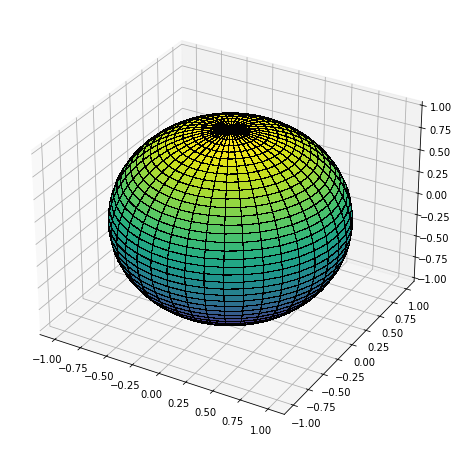

In [3]:
manifold.show()

### Plotting points

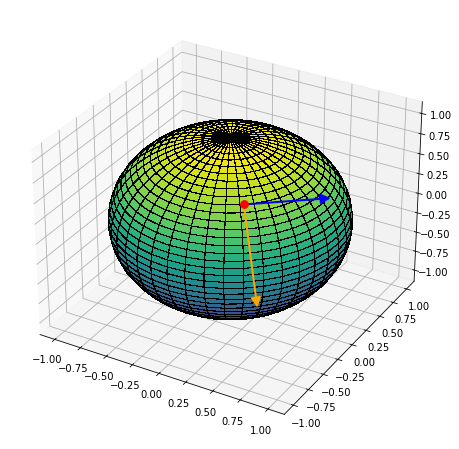

In [4]:
uv = torch.tensor([-0.9, np.pi/4])
manifold.show_point(uv)

### Defining a curve through the manifold in extrinsic coordinates

In [5]:
coordinate_path = lambda t: np.stack([0*t, t*np.pi]) # [u, v]

### Curve visualization

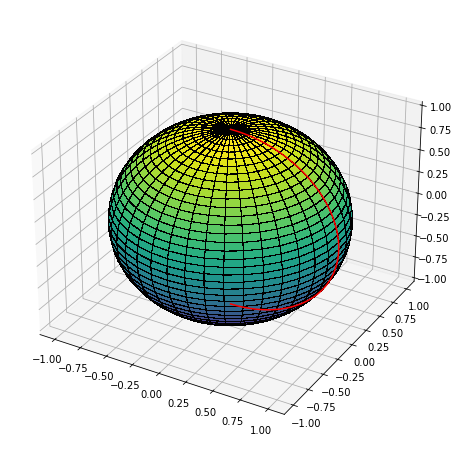

In [6]:
manifold.show_curve(coordinate_path)

In [7]:
manifold.compute_curve_length(coordinate_path)

3.1415926535897896

### Querying the Metric tensor & the Christoffel symbols

In [8]:
manifold.g(uv)

tensor([[0.5000, 0.0000],
        [0.0000, 1.0000]])

In [9]:
manifold.Gamma([0.0, torch.pi/4])

tensor([[[ 0.0000,  1.0000],
         [ 1.0000,  0.0000]],

        [[-0.5000,  0.0000],
         [ 0.0000,  0.0000]]], grad_fn=<MulBackward0>)

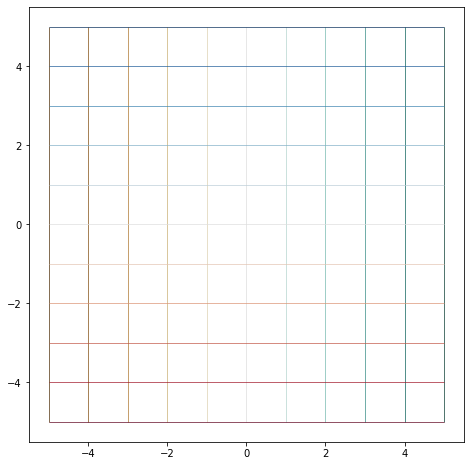

In [10]:
cartesian_plane = CartesianPlane()
cartesian_plane.show()

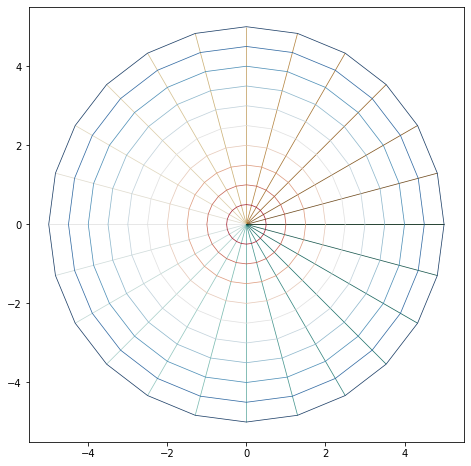

In [11]:
polar_plane = PolarPlane()
polar_plane.show()

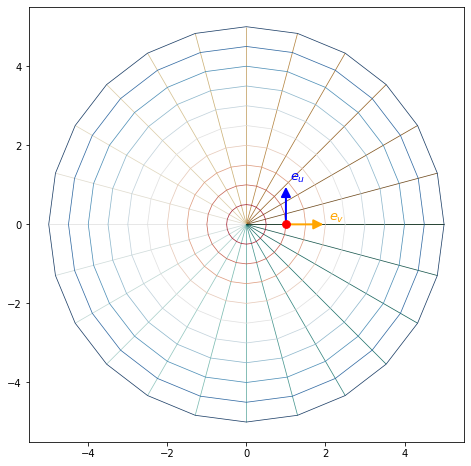

In [12]:
polar_plane.show_point([0.0, 1.0])

In [13]:
polar_plane.g(torch.tensor([0.0, 2.0]))

tensor([[4., 0.],
        [0., 1.]], grad_fn=<MmBackward0>)

In [14]:
polar_plane.Gamma(torch.tensor([0.0, 1.0]))

tensor([[[ 0.,  1.],
         [ 1.,  0.]],

        [[-1.,  0.],
         [ 0.,  0.]]], grad_fn=<MulBackward0>)

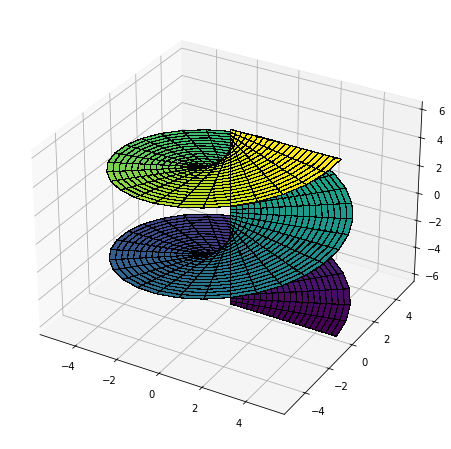

In [15]:
class CircularLadder(EmbeddedRiemannianManifold):
    embedding_dim = 3
    def __init__(self):
        pass

    coordinate_domain = [-2*torch.pi, 2*torch.pi], [0.0, 5]
    default_subdivisions = 61, 21
    
    def embedded(self, coords: torch.Tensor) -> torch.Tensor:
        phi, r = torch.as_tensor(coords)
        return torch.stack((
            r * torch.cos(phi),
            r * torch.sin(phi),
            phi
        ))

circ_ladder = CircularLadder()
circ_ladder.show()

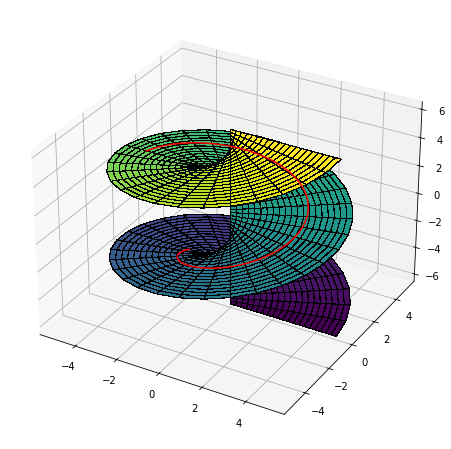

Curve length: 20.0075


In [17]:
curve = lambda t: np.stack([np.pi-t*2*np.pi, 4-2*t])
circ_ladder.show_curve(curve)
print(f'Curve length: {circ_ladder.compute_curve_length(curve):.4f}')